Big_Black_Money_ Analysis

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import express as px
from plotly import graph_objects as go
import warnings

# Set visual aesthetics for plots
sns.set(style="whitegrid")

# Ignore warnings to keep the notebook clean
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv('Big_Black_Money_Dataset.csv')

In [8]:
df.head()

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country
0,TX0000000001,Brazil,3.267530e+06,Offshore Transfer,2013-01-01 00:00:00,Person_1101,Construction,USA,True,Illegal,6,1,Bank_40,Singapore
1,TX0000000002,China,4.965767e+06,Stocks Transfer,2013-01-01 01:00:00,Person_7484,Luxury Goods,South Africa,False,Illegal,9,0,Bank_461,Bahamas
2,TX0000000003,UK,9.416750e+04,Stocks Transfer,2013-01-01 02:00:00,Person_3655,Construction,Switzerland,True,Illegal,1,3,Bank_387,Switzerland
3,TX0000000004,UAE,3.864201e+05,Cash Withdrawal,2013-01-01 03:00:00,Person_3226,Oil & Gas,Russia,False,Illegal,7,2,Bank_353,Panama
4,TX0000000005,South Africa,6.433784e+05,Cryptocurrency,2013-01-01 04:00:00,Person_7975,Real Estate,USA,True,Illegal,1,9,Bank_57,Luxembourg


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction ID               10000 non-null  object 
 1   Country                      10000 non-null  object 
 2   Amount (USD)                 10000 non-null  float64
 3   Transaction Type             10000 non-null  object 
 4   Date of Transaction          10000 non-null  object 
 5   Person Involved              10000 non-null  object 
 6   Industry                     10000 non-null  object 
 7   Destination Country          10000 non-null  object 
 8   Reported by Authority        10000 non-null  bool   
 9   Source of Money              10000 non-null  object 
 10  Money Laundering Risk Score  10000 non-null  int64  
 11  Shell Companies Involved     10000 non-null  int64  
 12  Financial Institution        10000 non-null  object 
 13  Tax Haven Country

In [12]:
df.describe()

,Amount (USD),Money Laundering Risk Score,Shell Companies Involved
count,1.000000e+04,10000.000000,10000.000000
mean,2.501818e+06,5.526400,4.469400
std,1.424364e+06,2.893603,2.879773
min,1.003180e+04,1.000000,0.000000
25%,1.279005e+06,3.000000,2.000000
50%,2.501310e+06,6.000000,4.000000
75%,3.722416e+06,8.000000,7.000000
max,4.999812e+06,10.000000,9.000000


In [14]:
df.isnull().sum()

Transaction ID                 0
Country                        0
Amount (USD)                   0
Transaction Type               0
Date of Transaction            0
Person Involved                0
Industry                       0
Destination Country            0
Reported by Authority          0
Source of Money                0
Money Laundering Risk Score    0
Shell Companies Involved       0
Financial Institution          0
Tax Haven Country              0
dtype: int64

In [30]:
df.nunique()

Transaction ID                 10000
Country                           10
Amount (USD)                   10000
Transaction Type                   5
Date of Transaction            10000
Person Involved                 6320
Industry                           7
Destination Country               10
Reported by Authority              2
Source of Money                    2
Money Laundering Risk Score       10
Shell Companies Involved          10
Financial Institution            499
Tax Haven Country                  6
dtype: int64

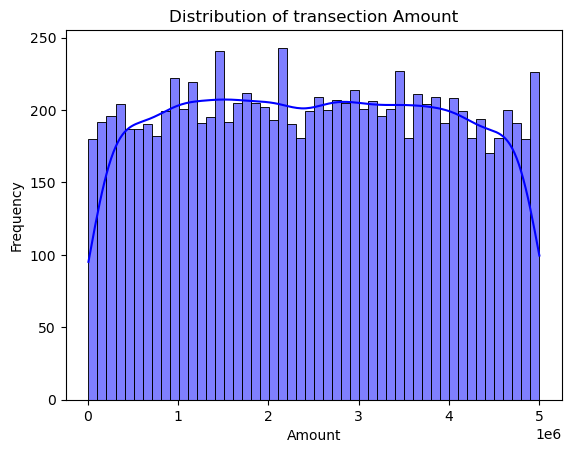

In [32]:
sns.histplot(df['Amount (USD)'],bins=50,kde=True,color='blue')
plt.title('Distribution of transection Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

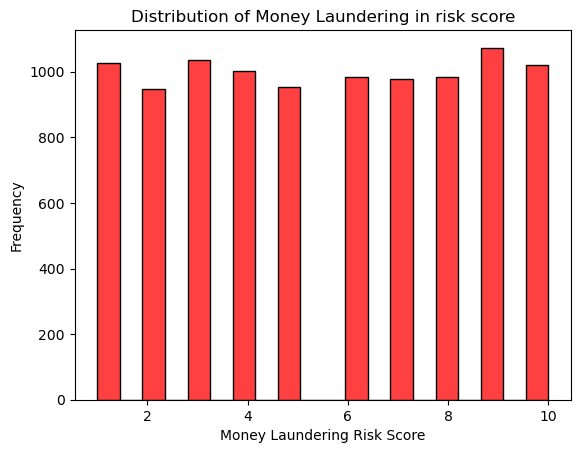

In [36]:
sns.histplot(df['Money Laundering Risk Score'],bins=20 ,color='red')
plt.title('Distribution of Money Laundering in risk score')
plt.xlabel('Money Laundering Risk Score')
plt.ylabel('Frequency')
plt.show()

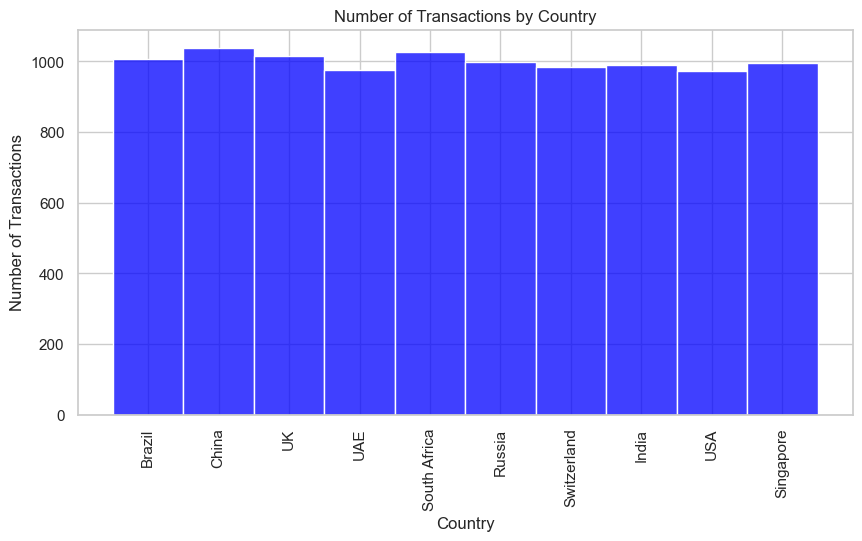

In [72]:
# Count of transactions by country
plt.figure(figsize=(10, 5))
sns.histplot(df['Country'], color='blue',)
plt.title('Number of Transactions by Country')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.show()

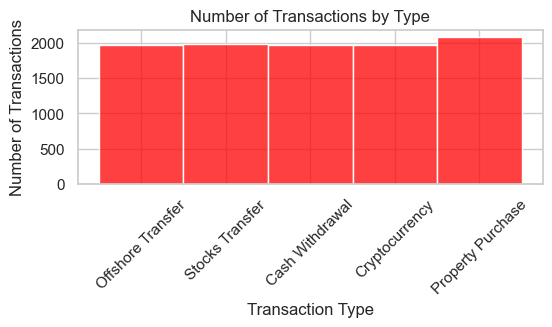

In [90]:
# Count of transactions by transaction type
plt.figure(figsize=(6,2))
sns.histplot(df['Transaction Type'],color='red')
plt.title('Number of Transactions by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

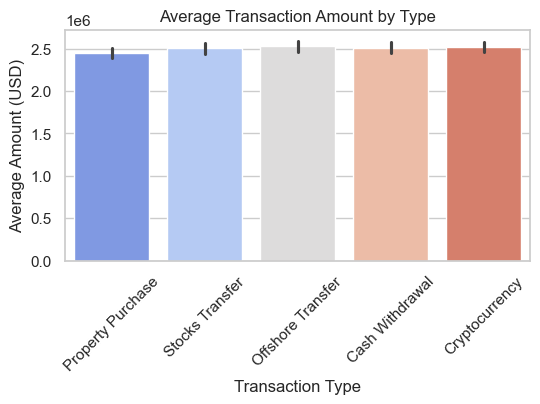

In [112]:
# Average transaction amount by transaction type
plt.figure(figsize=(6, 3))
sns.barplot(data=df, x='Transaction Type', y='Amount (USD)', palette='coolwarm', order=df['Transaction Type'].value_counts().index)
plt.title('Average Transaction Amount by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Average Amount (USD)')
plt.xticks(rotation=45)
plt.show()

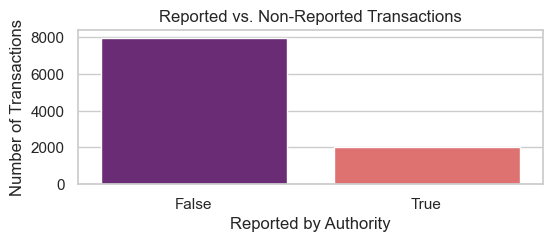

In [118]:
plt.figure(figsize=(6,2))
sns.countplot(data=df,x='Reported by Authority',palette='magma')
plt.title('Reported vs. Non-Reported Transactions')
plt.xlabel('Reported by Authority')
plt.ylabel('Number of Transactions')
plt.show()

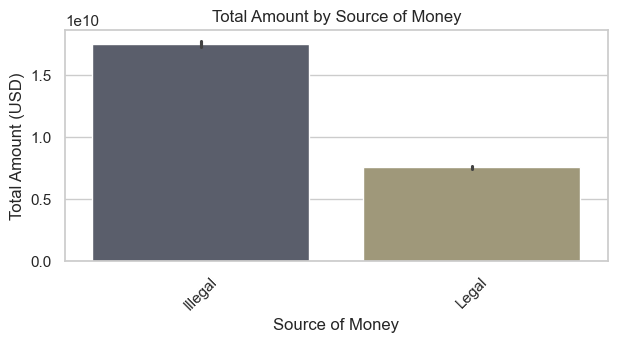

In [124]:
# Total amount by source of money
plt.figure(figsize=(7,3))
sns.barplot(data=df, x='Source of Money', y='Amount (USD)', estimator=np.sum, palette='cividis', order=df['Source of Money'].value_counts().index)
plt.title('Total Amount by Source of Money')
plt.xlabel('Source of Money')
plt.ylabel('Total Amount (USD)')
plt.xticks(rotation=45)
plt.show()

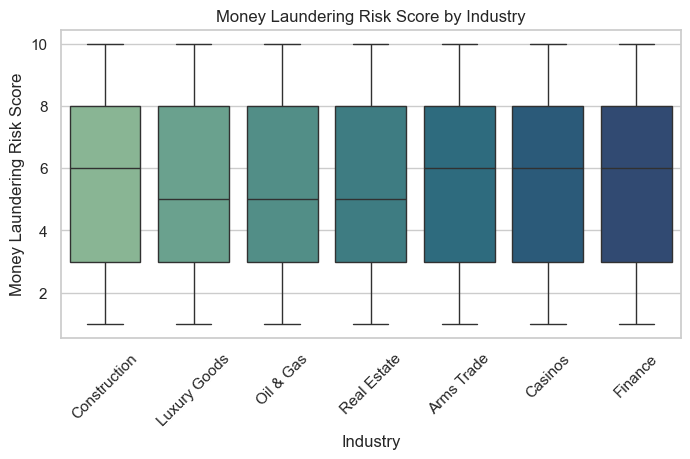

In [128]:
# Money laundering risk score by industry
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='Industry', y='Money Laundering Risk Score', palette='crest')
plt.title('Money Laundering Risk Score by Industry')
plt.xlabel('Industry')
plt.ylabel('Money Laundering Risk Score')
plt.xticks(rotation=45)
plt.show()

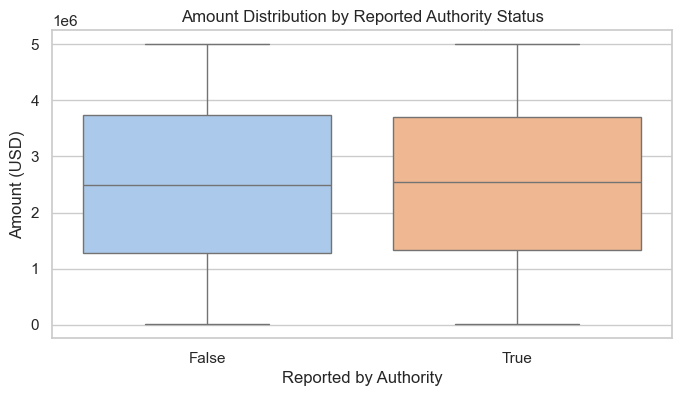

In [132]:
# Amount distribution by reported authority status
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='Reported by Authority', y='Amount (USD)', palette='pastel')
plt.title('Amount Distribution by Reported Authority Status')
plt.xlabel('Reported by Authority')
plt.ylabel('Amount (USD)')
plt.show()

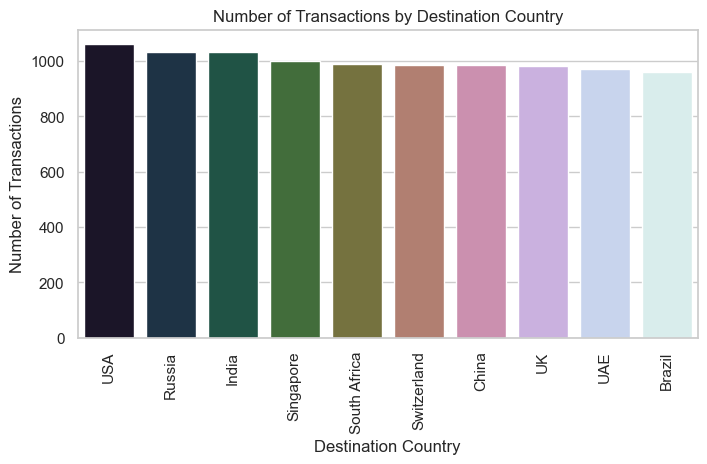

In [134]:
# Count of transactions by destination country
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Destination Country', order=df['Destination Country'].value_counts().index, palette='cubehelix')
plt.title('Number of Transactions by Destination Country')
plt.xlabel('Destination Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.show()

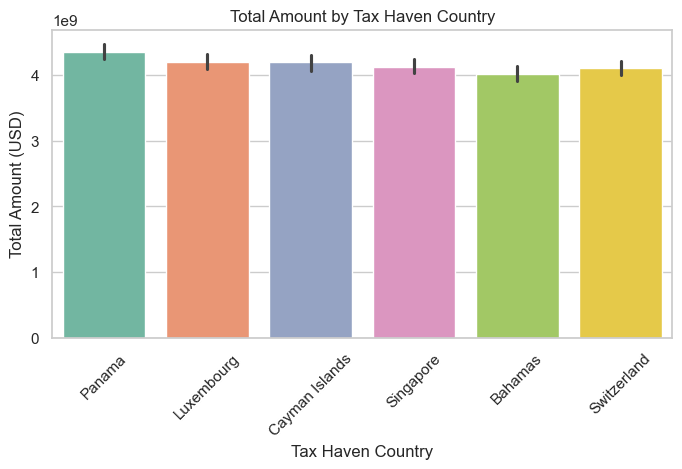

In [136]:
# Total amount by tax haven country
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='Tax Haven Country', y='Amount (USD)', estimator=np.sum, palette='Set2', order=df['Tax Haven Country'].value_counts().index)
plt.title('Total Amount by Tax Haven Country')
plt.xlabel('Tax Haven Country')
plt.ylabel('Total Amount (USD)')
plt.xticks(rotation=45)
plt.show()

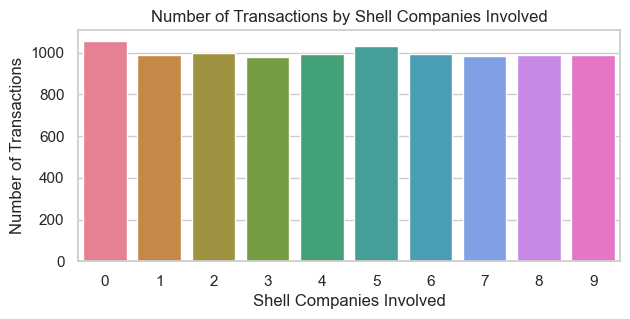

In [140]:
# Count of transactions by number of shell companies involved
plt.figure(figsize=(7,3))
sns.countplot(data=df, x='Shell Companies Involved', palette='husl')
plt.title('Number of Transactions by Shell Companies Involved')
plt.xlabel('Shell Companies Involved')
plt.ylabel('Number of Transactions')
plt.show()

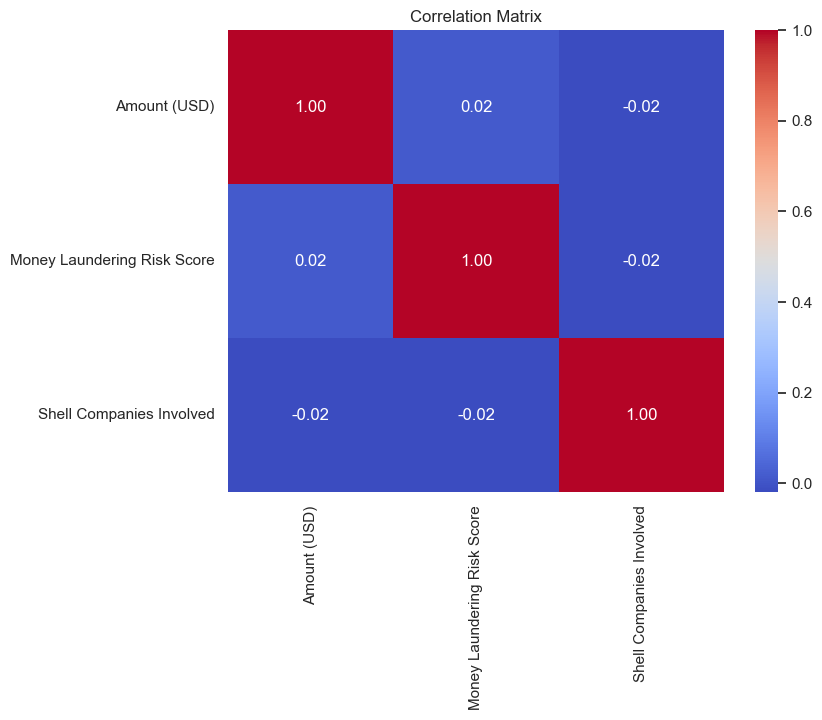

In [144]:
# Correlation matrix of numerical features
plt.figure(figsize=(8,6))
correlation_matrix = df[['Amount (USD)', 'Money Laundering Risk Score', 'Shell Companies Involved']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

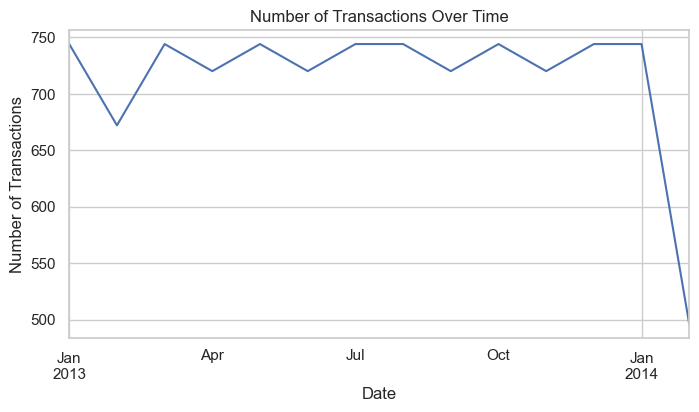

In [152]:
# Convert 'Date of Transaction' to datetime format
df['Date of Transaction'] = pd.to_datetime(df['Date of Transaction'])

# Time series analysis of transactions over time
plt.figure(figsize=(8,4))
df.groupby(df['Date of Transaction'].dt.to_period('M')).size().plot()
plt.title('Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

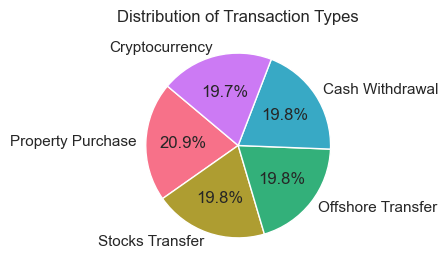

In [156]:
# Pie chart of transaction types
plt.figure(figsize=(6,3))
df['Transaction Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('husl', n_colors=df['Transaction Type'].nunique()))
plt.title('Distribution of Transaction Types')
plt.ylabel('')
plt.show()

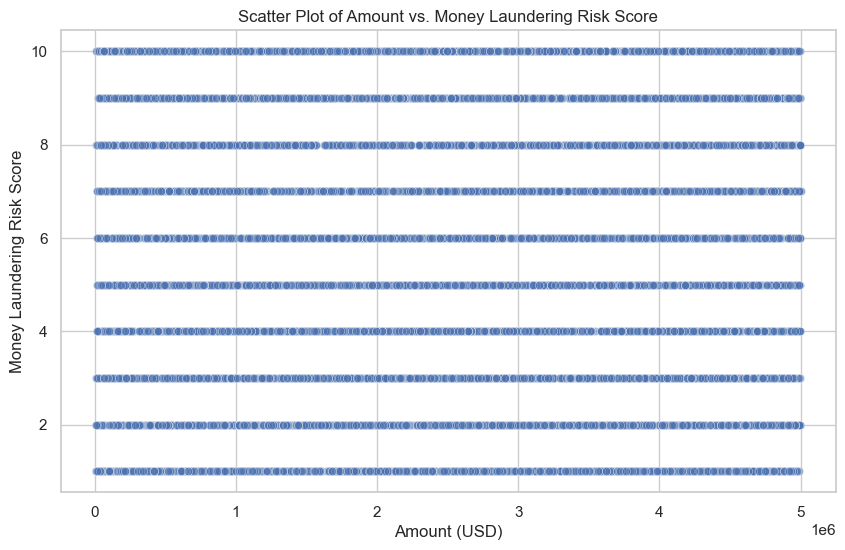

In [158]:
# Scatter plot of amount vs. money laundering risk score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Amount (USD)', y='Money Laundering Risk Score', alpha=0.5)
plt.title('Scatter Plot of Amount vs. Money Laundering Risk Score')
plt.xlabel('Amount (USD)')
plt.ylabel('Money Laundering Risk Score')
plt.show()

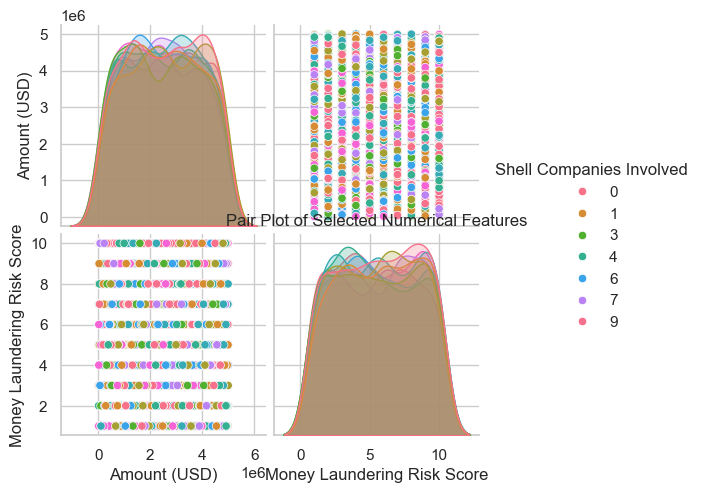

In [160]:
# Pair plot of selected numerical features
selected_features = df[['Amount (USD)', 'Money Laundering Risk Score', 'Shell Companies Involved']]
sns.pairplot(selected_features, diag_kind='kde', hue='Shell Companies Involved', palette='husl')
plt.title('Pair Plot of Selected Numerical Features')
plt.show()

Conclusion :
The analysis of the Global Black Money Transactions Dataset provides valuable insights into black money activities. Through various visualizations and statistical analyses, key patterns, trends, and relationships were identified. This comprehensive analysis enhances the understanding of global black money transactions and offers a basis for further investigation.